### Importing necessary Libraries & Dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

divorce_data = pd.read_csv(r'C:\Users\SHREE\Downloads\Python CODES\Divorce Prediction using Machine Learning\divorce_data.csv')
divorce_data.head()

,Atr1,Atr2,Atr3,Atr4,Atr5,Atr6,Atr7,Atr8,Atr9,Atr10,...,Atr46,Atr47,Atr48,Atr49,Atr50,Atr51,Atr52,Atr53,Atr54,Class
0,2,2,4,1,0,0,0,0,0,0,...,2,1,3,3,3,2,3,2,1,1
1,4,4,4,4,4,0,0,4,4,4,...,2,2,3,4,4,4,4,2,2,1
2,2,2,2,2,1,3,2,1,1,2,...,3,2,3,1,1,1,2,2,2,1
3,3,2,3,2,3,3,3,3,3,3,...,2,2,3,3,3,3,2,2,2,1
4,2,2,1,1,1,1,0,0,0,0,...,2,1,2,3,2,2,2,1,0,1


### Exploratory Data Analysis

In [2]:
divorce_data.shape

(170, 55)

In [3]:
divorce_data.columns

Index(['Atr1', 'Atr2', 'Atr3', 'Atr4', 'Atr5', 'Atr6', 'Atr7', 'Atr8', 'Atr9',
       'Atr10', 'Atr11', 'Atr12', 'Atr13', 'Atr14', 'Atr15', 'Atr16', 'Atr17',
       'Atr18', 'Atr19', 'Atr20', 'Atr21', 'Atr22', 'Atr23', 'Atr24', 'Atr25',
       'Atr26', 'Atr27', 'Atr28', 'Atr29', 'Atr30', 'Atr31', 'Atr32', 'Atr33',
       'Atr34', 'Atr35', 'Atr36', 'Atr37', 'Atr38', 'Atr39', 'Atr40', 'Atr41',
       'Atr42', 'Atr43', 'Atr44', 'Atr45', 'Atr46', 'Atr47', 'Atr48', 'Atr49',
       'Atr50', 'Atr51', 'Atr52', 'Atr53', 'Atr54', 'Class'],
      dtype='object')

In [4]:
with open('divorce.txt') as f:
    contents = f.read()
    print(contents)

Questions are ranked on a scale of 1-5 with 1 being the lowest and 5 being the highest. The last category states if the couple has divorced.

1.	If one of us apologizes when our discussion deteriorates, the discussion ends.
2.	I know we can ignore our differences, even if things get hard sometimes.
3.	When we need it, we can take our discussions with my spouse from the beginning and correct it.
4.	When I discuss with my spouse, to contact him will eventually work.
5.	The time I spent with my wife is special for us.
6.	We don't have time at home as partners.
7.	We are like two strangers who share the same environment at home rather than family.
8.	I enjoy our holidays with my wife.
9.	I enjoy traveling with my wife.
10.	Most of our goals are common to my spouse.
11.	I think that one day in the future, when I look back, I see that my spouse and I have been in harmony with each other.
12.	My spouse and I have similar values in terms of personal freedom.
13.	My spouse and I have similar se

In [5]:
divorce_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 170 entries, 0 to 169
Data columns (total 55 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Atr1    170 non-null    int64
 1   Atr2    170 non-null    int64
 2   Atr3    170 non-null    int64
 3   Atr4    170 non-null    int64
 4   Atr5    170 non-null    int64
 5   Atr6    170 non-null    int64
 6   Atr7    170 non-null    int64
 7   Atr8    170 non-null    int64
 8   Atr9    170 non-null    int64
 9   Atr10   170 non-null    int64
 10  Atr11   170 non-null    int64
 11  Atr12   170 non-null    int64
 12  Atr13   170 non-null    int64
 13  Atr14   170 non-null    int64
 14  Atr15   170 non-null    int64
 15  Atr16   170 non-null    int64
 16  Atr17   170 non-null    int64
 17  Atr18   170 non-null    int64
 18  Atr19   170 non-null    int64
 19  Atr20   170 non-null    int64
 20  Atr21   170 non-null    int64
 21  Atr22   170 non-null    int64
 22  Atr23   170 non-null    int64
 23  Atr24   170 non

In [6]:
divorce_data.describe().T

,count,mean,std,min,25%,50%,75%,max
Atr1,170.0,1.776471,1.627257,0.0,0.0,2.0,3.0,4.0
Atr2,170.0,1.652941,1.468654,0.0,0.0,2.0,3.0,4.0
Atr3,170.0,1.764706,1.415444,0.0,0.0,2.0,3.0,4.0
Atr4,170.0,1.482353,1.504327,0.0,0.0,1.0,3.0,4.0
Atr5,170.0,1.541176,1.632169,0.0,0.0,1.0,3.0,4.0
Atr6,170.0,0.747059,0.904046,0.0,0.0,0.0,1.0,4.0
Atr7,170.0,0.494118,0.898698,0.0,0.0,0.0,1.0,4.0
Atr8,170.0,1.452941,1.546371,0.0,0.0,1.0,3.0,4.0
Atr9,170.0,1.458824,1.557976,0.0,0.0,1.0,3.0,4.0
Atr10,170.0,1.576471,1.421529,0.0,0.0,2.0,3.0,4.0


In [7]:
divorce_data.isnull().sum()

Atr1     0
Atr2     0
Atr3     0
Atr4     0
Atr5     0
Atr6     0
Atr7     0
Atr8     0
Atr9     0
Atr10    0
Atr11    0
Atr12    0
Atr13    0
Atr14    0
Atr15    0
Atr16    0
Atr17    0
Atr18    0
Atr19    0
Atr20    0
Atr21    0
Atr22    0
Atr23    0
Atr24    0
Atr25    0
Atr26    0
Atr27    0
Atr28    0
Atr29    0
Atr30    0
Atr31    0
Atr32    0
Atr33    0
Atr34    0
Atr35    0
Atr36    0
Atr37    0
Atr38    0
Atr39    0
Atr40    0
Atr41    0
Atr42    0
Atr43    0
Atr44    0
Atr45    0
Atr46    0
Atr47    0
Atr48    0
Atr49    0
Atr50    0
Atr51    0
Atr52    0
Atr53    0
Atr54    0
Class    0
dtype: int64

In [8]:
divorce_data.nunique()

Atr1     5
Atr2     5
Atr3     5
Atr4     5
Atr5     5
Atr6     5
Atr7     5
Atr8     5
Atr9     5
Atr10    5
Atr11    5
Atr12    5
Atr13    5
Atr14    5
Atr15    5
Atr16    5
Atr17    5
Atr18    5
Atr19    5
Atr20    5
Atr21    5
Atr22    5
Atr23    5
Atr24    5
Atr25    5
Atr26    5
Atr27    5
Atr28    5
Atr29    5
Atr30    5
Atr31    5
Atr32    5
Atr33    5
Atr34    5
Atr35    5
Atr36    5
Atr37    5
Atr38    5
Atr39    5
Atr40    5
Atr41    5
Atr42    5
Atr43    5
Atr44    5
Atr45    5
Atr46    5
Atr47    5
Atr48    5
Atr49    5
Atr50    5
Atr51    5
Atr52    5
Atr53    5
Atr54    5
Class    2
dtype: int64

In [9]:
divorce_data['Class'].value_counts()

0    86
1    84
Name: Class, dtype: int64

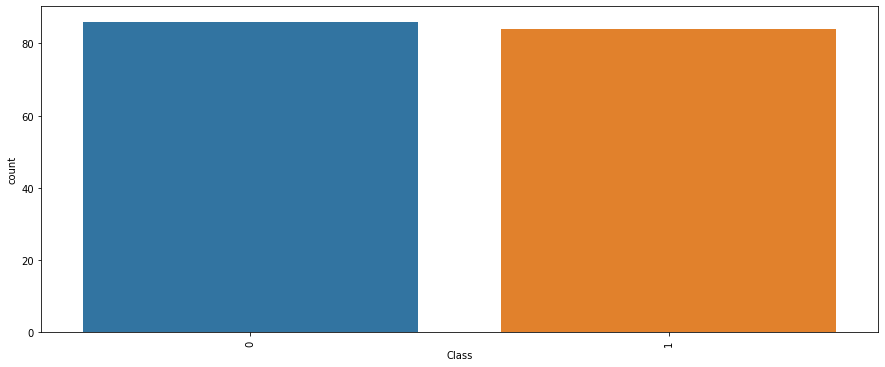

In [10]:
plt.figure(figsize=(15,6))
sns.countplot('Class', data = divorce_data)
plt.xticks(rotation = 90)
plt.show()

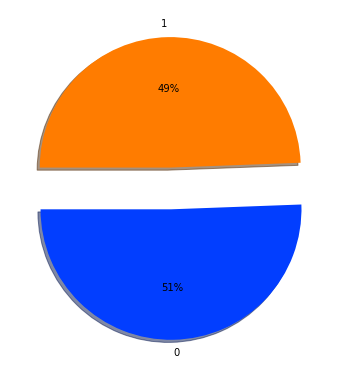

In [11]:
plt.figure(figsize=(15,6))
colors = sns.color_palette('bright')
explode = [0.3, 0.02]
plt.pie(divorce_data['Class'].value_counts(), colors = colors,
labels = [0, 1], autopct = '%0.0f%%', shadow = 'True',
explode = explode , startangle = 180)
plt.show()

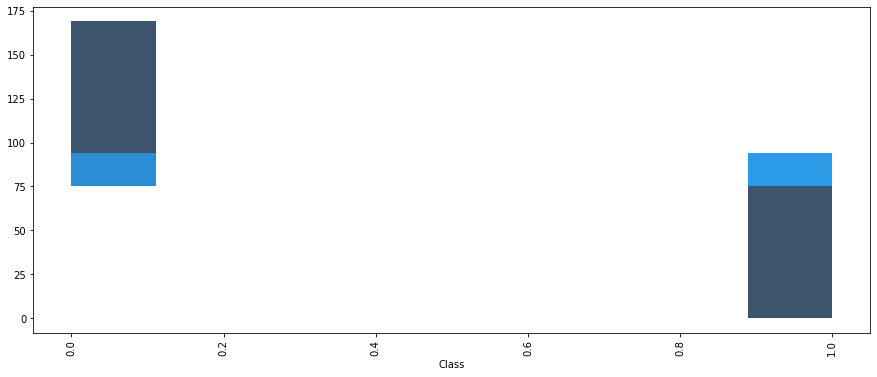

In [12]:
plt.figure(figsize=(15,6))
sns.histplot(x=divorce_data['Class'],y=divorce_data.index)
plt.xticks(rotation = 90)
plt.show()

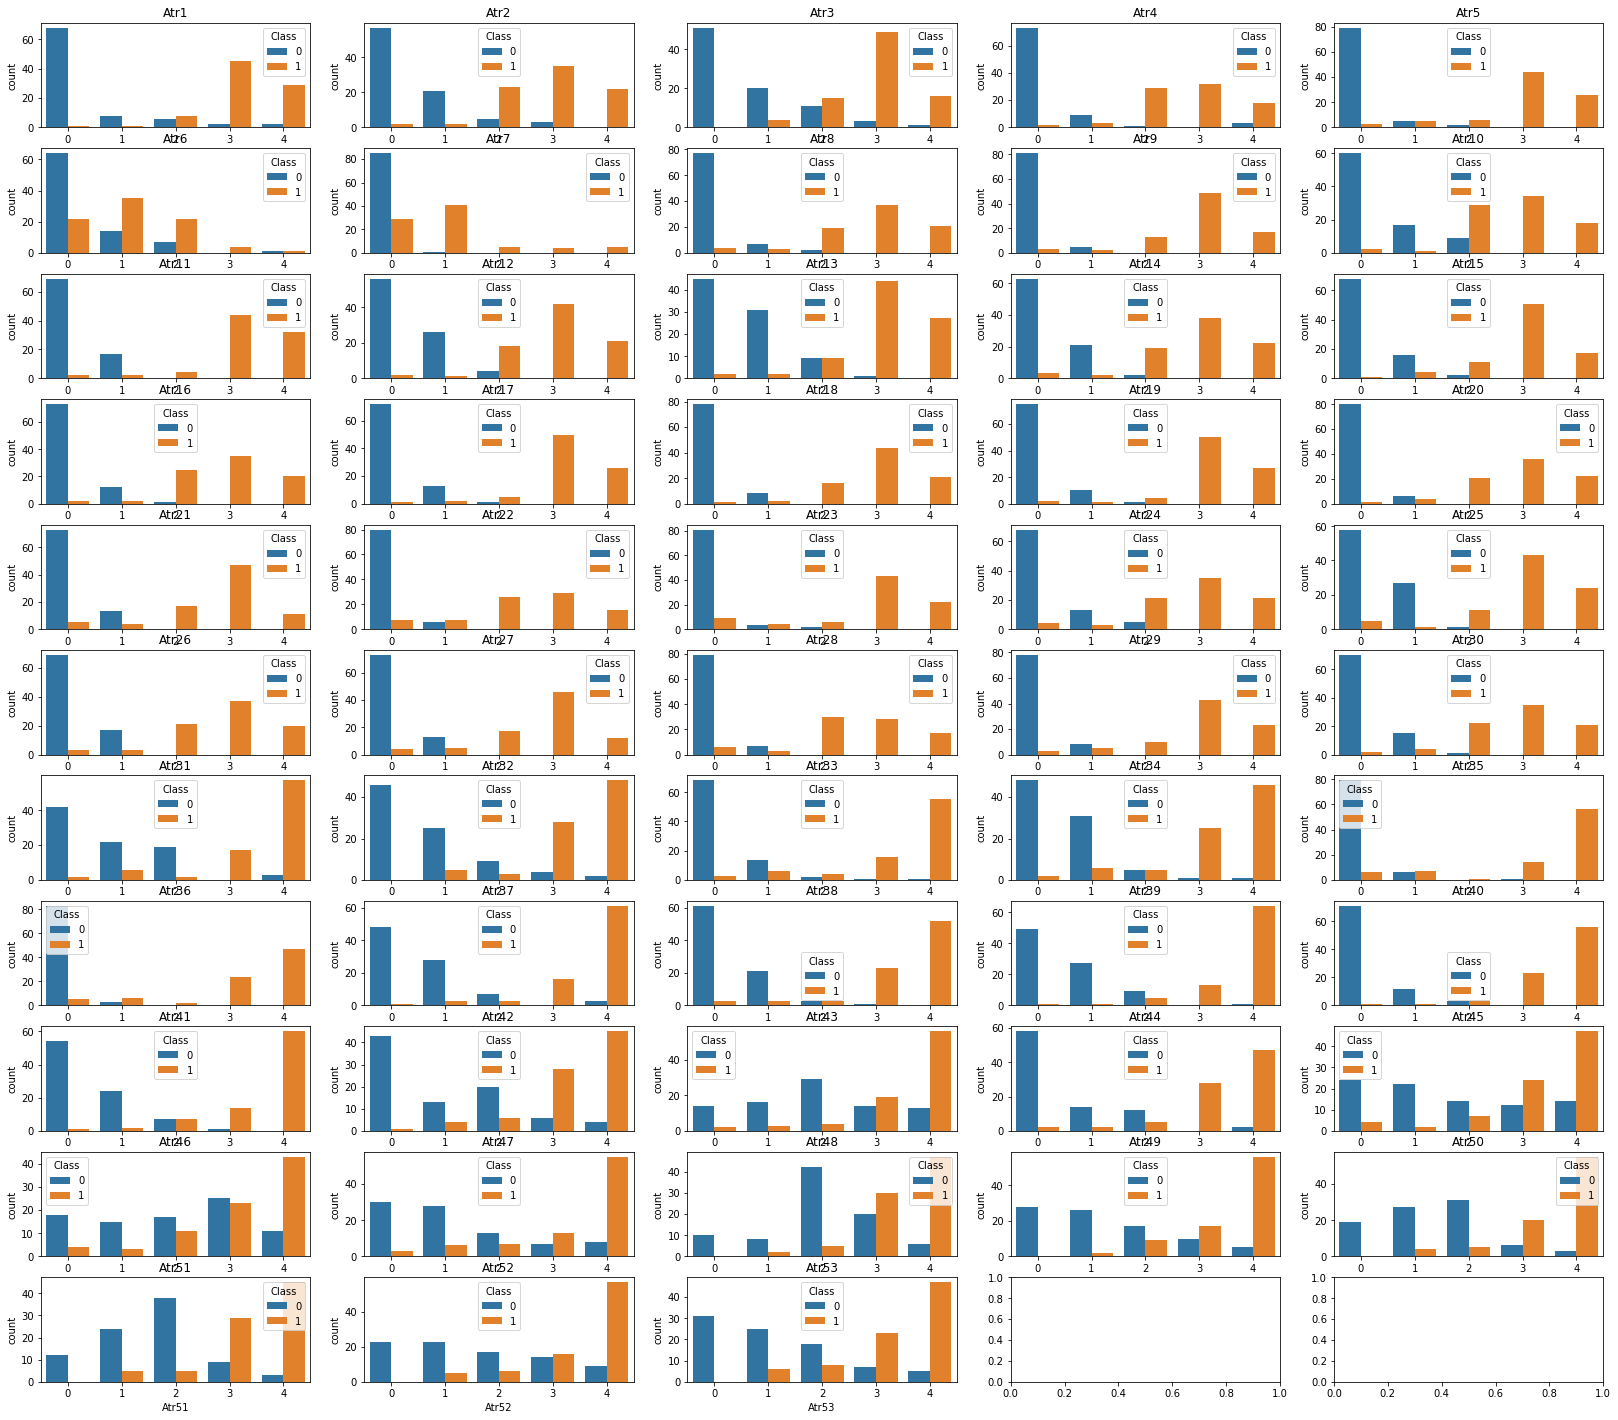

In [13]:
fig, axes = plt.subplots(11,5,figsize=(28,25))
s=0
for i in range(0,11):
    for j in range(0,5):
        s+=1
        if s==54:
            break
        sns.countplot(ax = axes[i,j],x=f'Atr{s}',data=divorce_data,
                      hue='Class')
        axes[i,j].set_title(f'Atr{s}')

In [14]:
divorce_data.corr()

,Atr1,Atr2,Atr3,Atr4,Atr5,Atr6,Atr7,Atr8,Atr9,Atr10,...,Atr46,Atr47,Atr48,Atr49,Atr50,Atr51,Atr52,Atr53,Atr54,Class
Atr1,1.000000,0.819066,0.832508,0.825066,0.881272,0.287140,0.427989,0.802357,0.845916,0.790183,...,0.400296,0.582693,0.633564,0.674843,0.725443,0.684143,0.575463,0.611422,0.768522,0.861324
Atr2,0.819066,1.000000,0.805876,0.791313,0.819360,0.102843,0.417616,0.864284,0.827711,0.782286,...,0.389519,0.616884,0.643762,0.659841,0.680538,0.636558,0.536294,0.610726,0.728897,0.820774
Atr3,0.832508,0.805876,1.000000,0.806709,0.800774,0.263032,0.464071,0.757264,0.816653,0.753017,...,0.308149,0.544863,0.638256,0.647961,0.663995,0.600603,0.491803,0.598749,0.673012,0.806709
Atr4,0.825066,0.791313,0.806709,1.000000,0.818472,0.185963,0.474806,0.798347,0.829053,0.873636,...,0.340240,0.552301,0.630205,0.699069,0.685263,0.624015,0.534264,0.588390,0.698264,0.819583
Atr5,0.881272,0.819360,0.800774,0.818472,1.000000,0.297834,0.381378,0.877584,0.916327,0.823659,...,0.470758,0.719899,0.659220,0.762257,0.795960,0.742664,0.663855,0.719493,0.836799,0.893180
Atr6,0.287140,0.102843,0.263032,0.185963,0.297834,1.000000,0.424212,0.184019,0.301342,0.266076,...,0.127759,0.212979,0.200673,0.201091,0.221100,0.179119,0.205056,0.258092,0.292428,0.420913
Atr7,0.427989,0.417616,0.464071,0.474806,0.381378,0.424212,1.000000,0.412807,0.517522,0.498266,...,0.069850,0.254225,0.311110,0.291325,0.332370,0.349920,0.243104,0.313725,0.347493,0.544835
Atr8,0.802357,0.864284,0.757264,0.798347,0.877584,0.184019,0.412807,1.000000,0.915301,0.828031,...,0.433541,0.675584,0.588531,0.674776,0.729668,0.690190,0.658613,0.705071,0.807911,0.869569
Atr9,0.845916,0.827711,0.816653,0.829053,0.916327,0.301342,0.517522,0.915301,1.000000,0.852385,...,0.434318,0.693839,0.611726,0.711503,0.755509,0.713750,0.652376,0.699211,0.810977,0.912368
Atr10,0.790183,0.782286,0.753017,0.873636,0.823659,0.266076,0.498266,0.828031,0.852385,1.000000,...,0.342315,0.559998,0.550313,0.659604,0.672236,0.618666,0.513842,0.592641,0.698528,0.834897


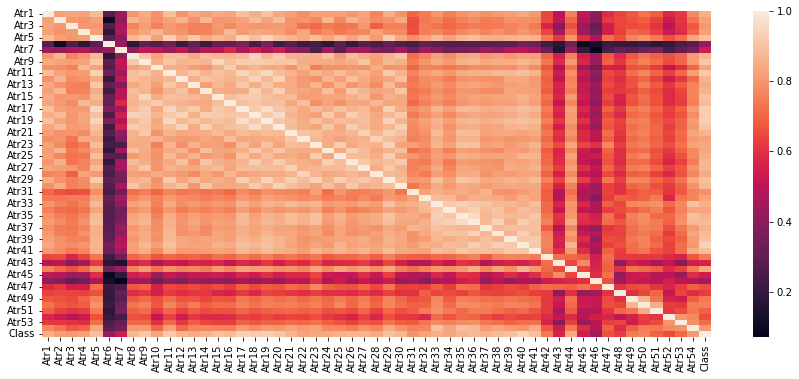

In [15]:
plt.figure(figsize=(15,6))
sns.heatmap(divorce_data.corr())
plt.show()

### Selecting the Target & Feature Variable

In [16]:
x = divorce_data.drop('Class',axis =1)
y = divorce_data['Class']

### Splitting the Data into Train & Test Data

In [17]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y,test_size=0.15,random_state=42)

### Model Building - Linear Regression

In [18]:
# importing module
from sklearn.linear_model import LinearRegression
# creating an object of LinearRegression class
LR = LinearRegression()
# fitting the training data
LR.fit(x_train,y_train)

LinearRegression()

### Model Predictions

In [19]:
y_prediction = LR.predict(x_test)
y_prediction

array([-2.98242255e-01,  1.04218550e+00, -1.91789945e-02,  1.03862867e+00,
        7.03564733e-02, -8.35928051e-04,  2.07739887e-02,  1.00384295e+00,
        9.70405323e-02,  9.92217945e-01,  1.06361244e+00,  1.53710970e-01,
        8.89485246e-02,  1.01424057e+00,  9.14619813e-01, -1.58940064e-01,
        1.04075060e+00, -4.42718464e-02,  9.76082286e-01,  2.16106731e-01,
        1.00445617e+00,  1.06361244e+00,  9.79472390e-01,  1.06082144e+00,
        1.06929121e+00,  3.62517357e-01])

### Model Accuracy

In [20]:
print("Training Accuracy :", LR.score(x_train, y_train))
print("Testing Accuracy :", LR.score(x_test, y_test))

Training Accuracy : 0.9714138394151279
Testing Accuracy : 0.8981950750068273


### Model Building - Random Forest

In [21]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()
clf.fit(x_train, y_train)

RandomForestClassifier()

### Model Predictions

In [22]:
y_pred = clf.predict(x_test)

### Model Accuracy

In [23]:
print("Training Accuracy :", clf.score(x_train, y_train))
print("Testing Accuracy :", clf.score(x_test, y_test))

Training Accuracy : 1.0
Testing Accuracy : 0.9615384615384616


In [24]:
from sklearn import metrics
print()
# using metrics module for accuracy calculation
print("ACCURACY OF THE MODEL: ", metrics.accuracy_score(y_test, y_pred))


ACCURACY OF THE MODEL:  0.9615384615384616
